## 다항 회귀

농어의 길이와 무게에 대한 산점도를 좀더 반영하면 직선이 아닌 곡선이며, 이는 2차 방정식 그래프이다. 

2차방정식 그래프를 그리기 위해서는 길이를 제곱한 항이 훈련세트에 추가되어야 함을 의미한다. 

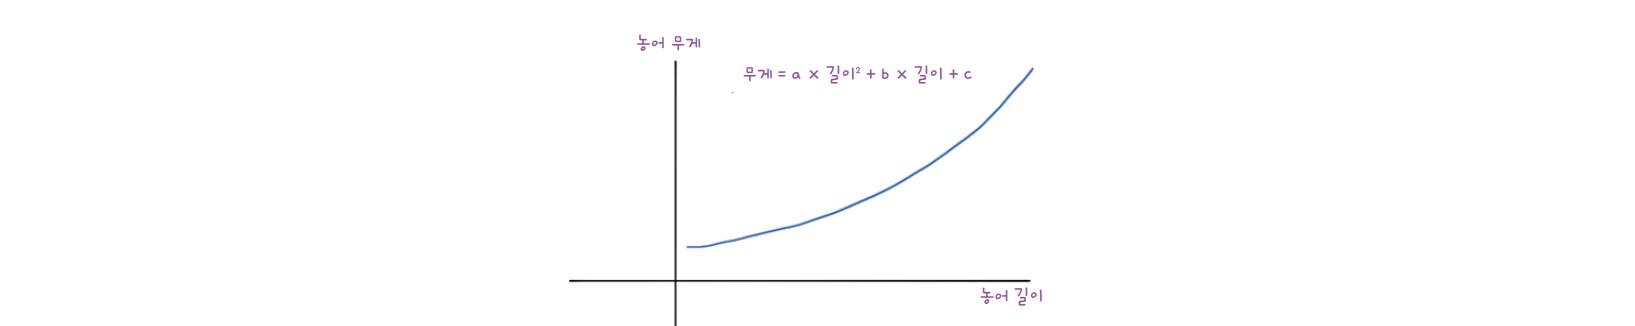

## 데이타 전처리

* PolynomialFeature()로 피처들을 다항으로 변환


* 1차 단항 피처들의 값 $[X_1,X_2] = [2,3]$일 경우
* 2차 다항 피처들의 값은 $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2] = [1,2,3,4,6,9]$로 변환
* 3차 다항 피처들의 값은 $[1,X_1,X_2,X_1^2,X_1X_2,X_2^2,X_1^3,X_1^2X_2,X_1X_2^2,X_2^3] = [1,2,3,4,6,9,8,12,18,27]$로 변환

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train)
poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

print('변환된 2차 다항식 계수 feature:\n', poly_train)

In [ ]:
#특성이 어떻게 만들어 졌는지 이름 출력
poly.get_feature_names_out()

In [ ]:
lr = LinearRegression()
lr.fit(poly_train, y_train) #학습

y_preds = lr.predict(poly_test) #예측

#50cm 농어도 훈련때와 같은 형태로 변환해야 함
print(lr.predict([[50, 50**2]]))

In [ ]:
print(lr.coef_, lr.intercept_)

---
**[농어 무게 예측 방정식]**

$ y = 1.01 * x^2 -21.6 *  x + 111.35$

---

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(X_train, y_train)

# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 111.35)

# 50cm 농어 데이터
plt.scatter([50], [1573], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

>  
> * 훈련세트의 경향을 잘 따르고 있고 무게가 음수로 나오는 일도 없다. 

In [ ]:
from sklearn.metrics import mean_squared_error , r2_score

#MSE : 에러들의 평균
mse = mean_squared_error(y_test, y_preds)

#R^2 : 실제와 예측의 분산비교
r2 = r2_score(y_test, y_preds)

print('MSE : {0:.3f}'.format(mse , rmse))
print('R^2 : {0:.3f}'.format(r2))

In [ ]:
print(lr.score(poly_train, y_train))
print(lr.score(poly_test, y_test))

> * 훈련 세트와 테스트 세트에 대한 점수가 크게 높아졌다. 
> * 하지만 여전히 테스트 세트의 점수가 조금 더 높고, 과소적합이 아직 남아 있는 것 같다. 
> * 조금 더 복잡한 모델이 필요할 것 같다. 
>
> * '길이'라는 한 개의 특성(feature)로는 무게를 예측하는 데 한계가 있을 것이다. 
> * 무게와 연관이 있는 다른 특성들을 조사하여 데이터를 수집한 후 무게 예측 모델을 만들어 봐야 할 것 같다. 